#**유통 판매량 예측 및 재고 최적화**
## **단계1 : 데이터 탐색 및 가설 도출**

# **0.미션**

* 예측해야 할 핵심상품 역할 분담
    * 핵심상품 별로, 데이터 탐색, 가설수립, 데이터셋 구성
    * 1인당 1~2개 정도를 분담하여 개별 과제 수행
    * 팀 미팅을 통해 진행 사항 공유 및 취합

* 데이터 탐색 및 가설 도출
    * 주어진 데이터에 대해 대상 매장, 대상 상품의 그래프 그리고 시계열 패턴을 찾기
    * 찾은 패턴을 기반으로 가설 도출

* 대상 상품(핵심 상품)

| Product_ID|Product_Code|SubCategory|Category|LeadTime|Price|
|----|----|----|----|----|----|
|3|DB001|Beverage|Drink|2|8|
|12|GA001|Milk|Food|3|6|
|42|FM001|Agricultural products|Grocery|3|5|


# **1.환경설정**

* 세부 요구사항
    * 구글콜랩
        * 구글 드라이브 바로 밑에 project 폴더를 만들고,
        * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 로딩
        * 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### **(1) 경로 설정**

* 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = '/content/drive/MyDrive/project/'

### **(2) 라이브러리 설치 및 불러오기**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

from sklearn.metrics import *
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

### **(3) 데이터 불러오기**

#### 1) 데이터로딩

In [2]:
oil_price = pd.read_csv(path + 'train/oil_price_train.csv')
orders = pd.read_csv(path + 'train/orders_train.csv')
sales = pd.read_csv(path + 'train/sales_train.csv')
products = pd.read_csv(path + 'train/products.csv')
stores = pd.read_csv(path + 'train/stores.csv')

sales['Date'] = pd.to_datetime(sales['Date'] )
oil_price['Date'] = pd.to_datetime(oil_price['Date'] )
orders['Date'] = pd.to_datetime(orders['Date'] )

NameError: name 'path' is not defined

# **2.데이터 탐색**

* 시계열 패턴을 찾아보기 위한 그래프를 그려 봅시다.

## **(1) 시계열 패턴 찾아보기1**

* 다음 항목은 패턴을 찾기 위한 예제 문항 입니다. 참조하여 시계열 패턴을 찾아 봅시다.
    * 대상 매장(44), 대상 상품(3,12,42)의 판매량 추이
    * 대상 상품의 동일 카테고리의 상품별 판매량 추이
    * 휘발류 가격과 상품 판매량 추이 비교
    * 방문 고객수와 상품 판매량 추이 비교
    * 그외...

### 1) 대상 매장(44), 대상 상품의 판매량 추이

##### 일자별 변동 그래프

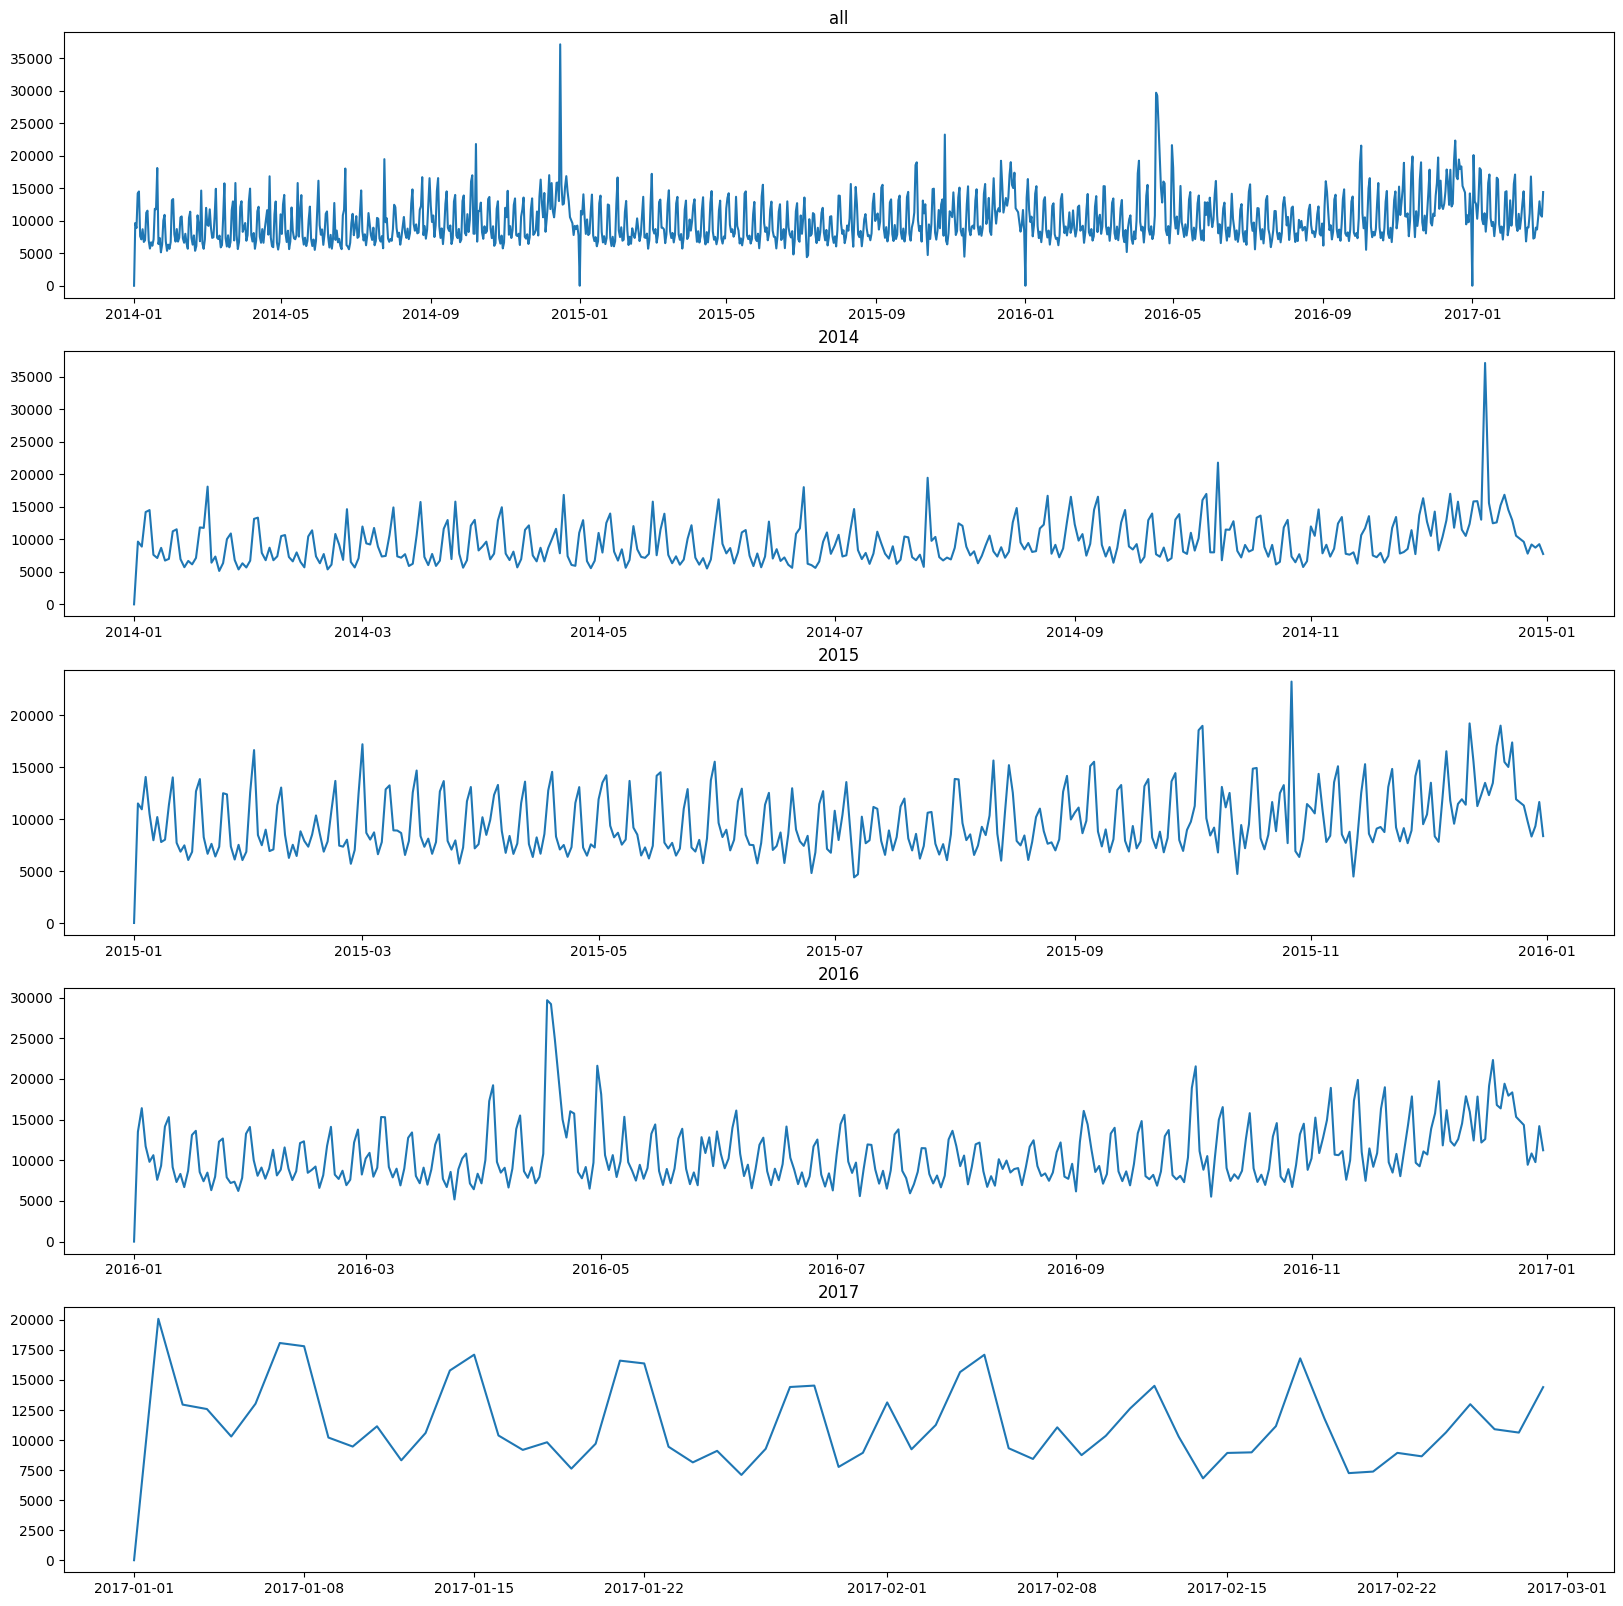

In [ ]:
# Product_ID = 12
plt.figure(figsize=(20,20))
plt.subplot(5,1,1)
plt.plot(sales44_12['Date'],sales44_12['Qty'])
plt.title('all')
years = [2014,2015,2016,2017]
for i in range(4):
    plt.subplot(5,1,i+2)
    plt.plot(sales44_12.loc[sales44_12['year']==years[i],'Date'],
                      sales44_12.loc[sales44_12['year']==years[i],'Qty'])
    plt.title(years[i])
plt.show()


##### 요일별 분석

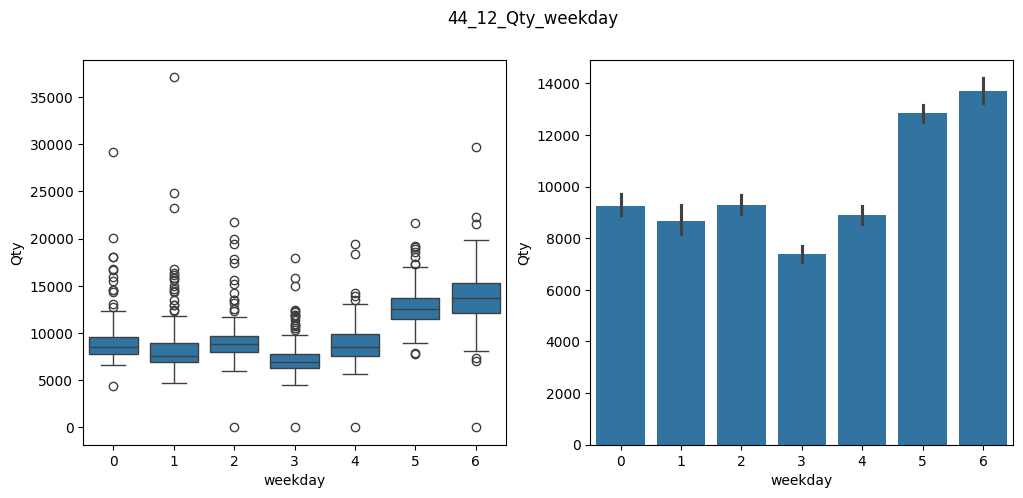

분산 분석 anova(Analysis Of Variance)
F_onewayResult(statistic=121.83393683251042, pvalue=4.3691923195527346e-119)


In [ ]:
# 그래프
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='weekday',y='Qty', data=sales44_12)
plt.subplot(1,2,2)
sns.barplot(x='weekday',y='Qty', data=sales44_12)
plt.suptitle('44_12_Qty_weekday')
plt.show()

print('분산 분석 anova(Analysis Of Variance)')
print(spst.f_oneway(W_0,W_1,W_2,W_3,W_4,W_5,W_6))

##### 월별 분석

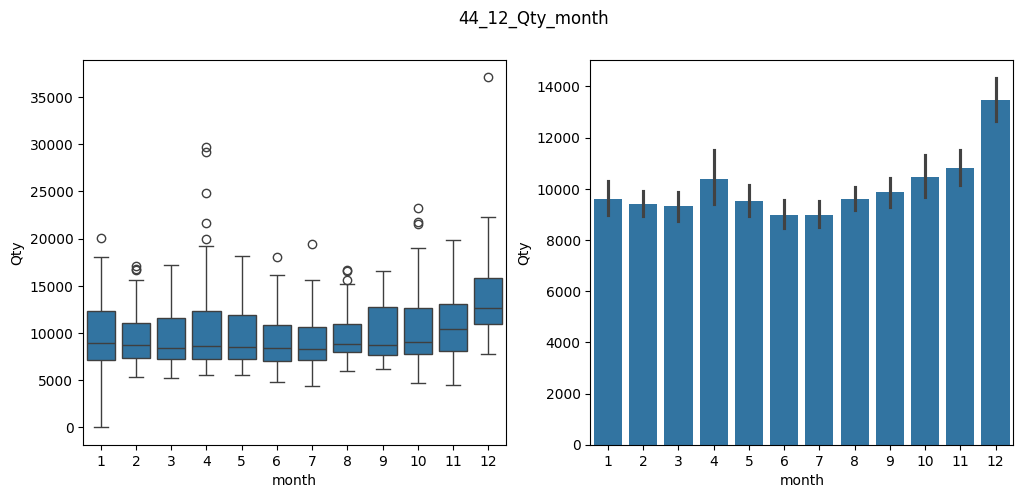

분산 분석 anova(Analysis Of Variance)


F_onewayResult(statistic=12.709168104076134, pvalue=5.723200847830177e-23)

In [ ]:
# 월별
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='month',y='Qty', data=sales44_12)
plt.subplot(1,2,2)
sns.barplot(x='month',y='Qty', data=sales44_12)
plt.suptitle('44_12_Qty_month')
plt.show()

print('분산 분석 anova(Analysis Of Variance)')
spst.f_oneway(m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12)

### 2) 대상 상품의 동일 카테고리의 상품별 판매량 추이

##### 일자별 변동 그래프

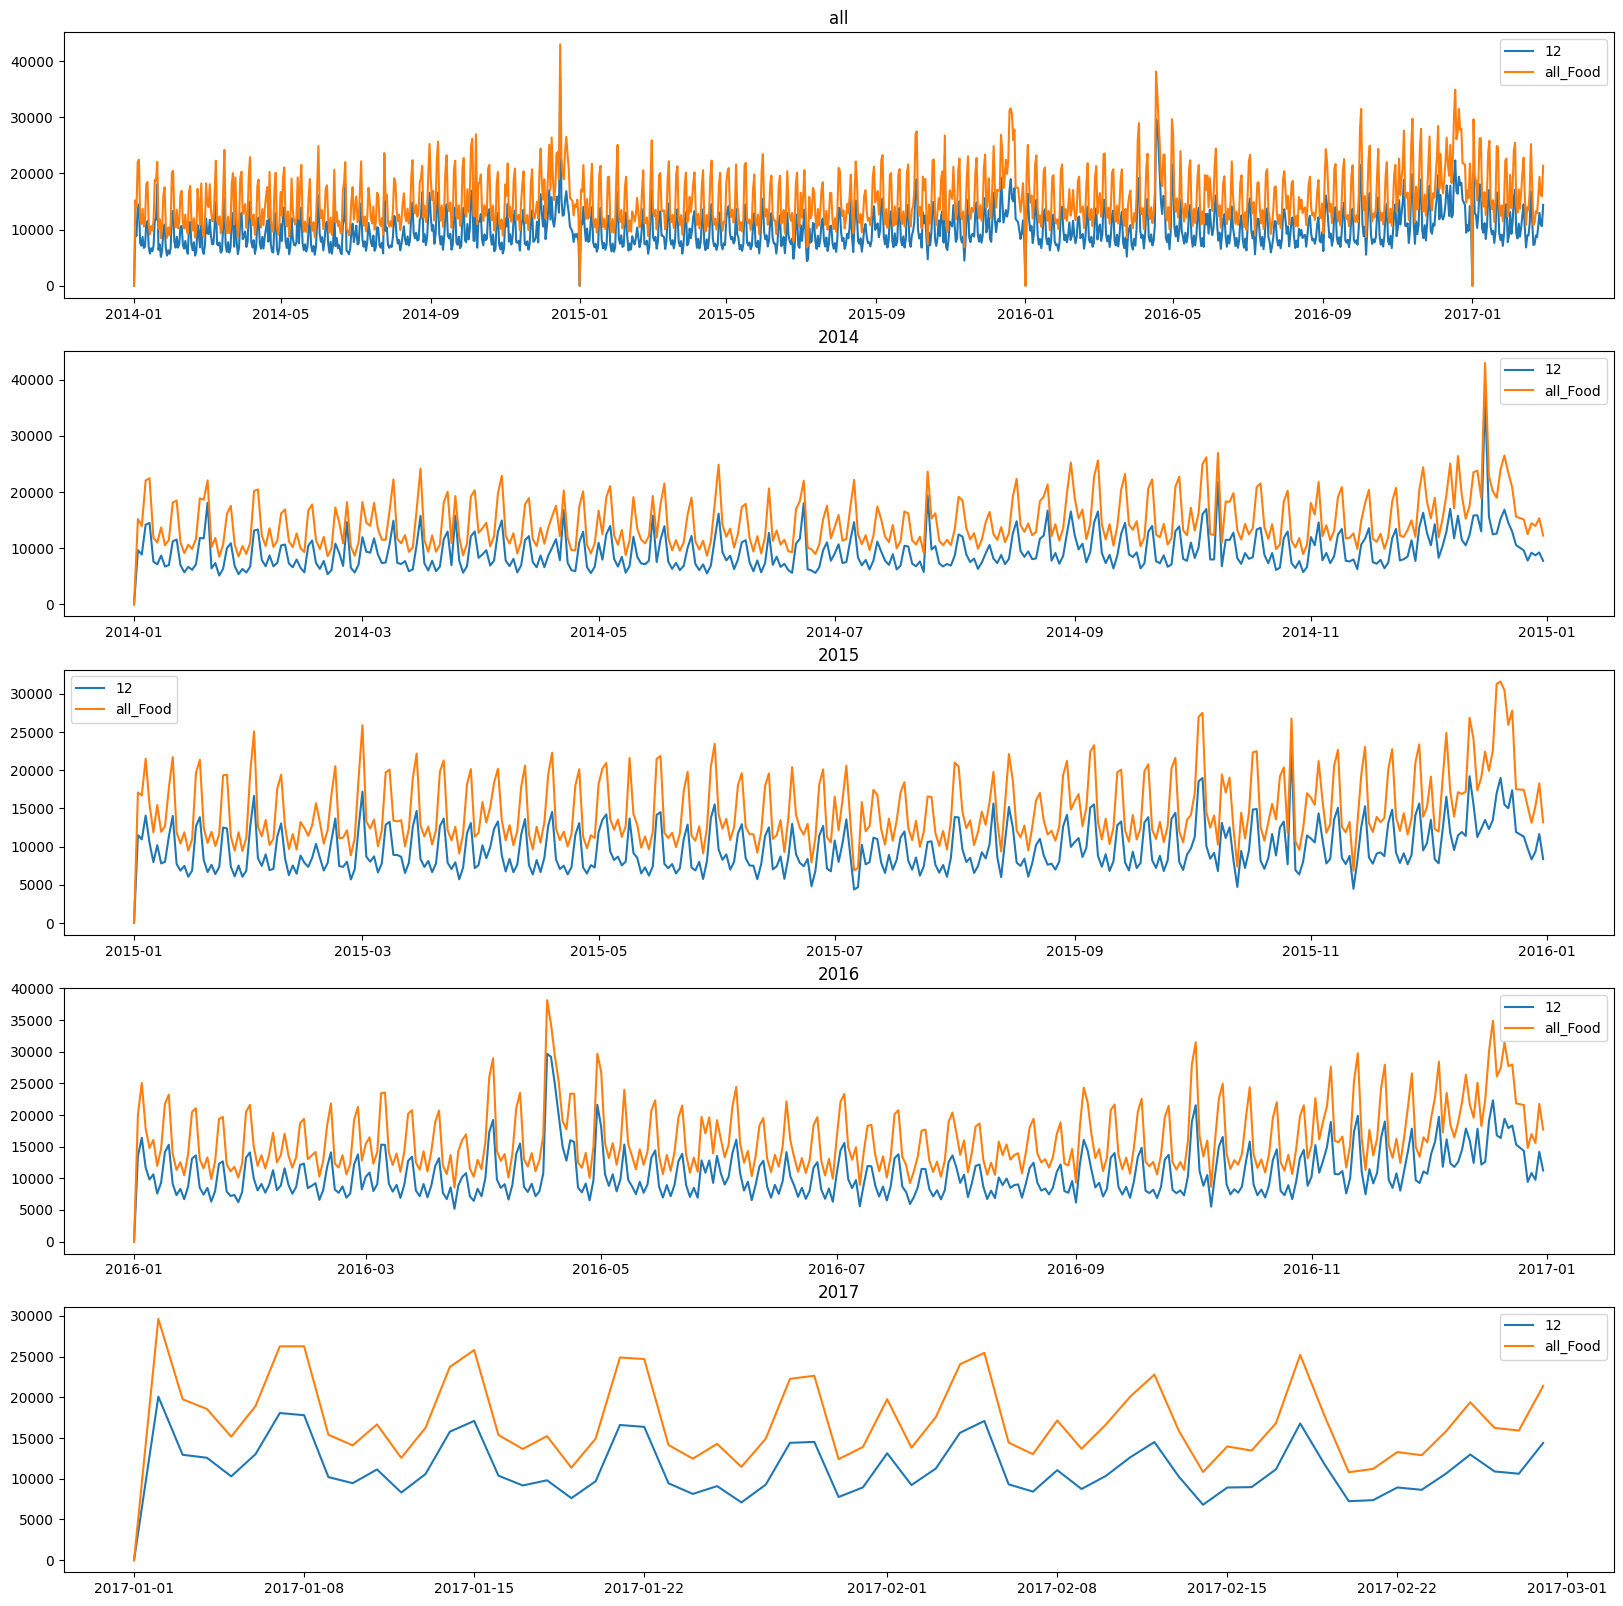

In [ ]:
# Product_ID = 12
plt.figure(figsize=(20,20))
plt.subplot(5,1,1)
plt.plot(sales44_12['Date'],sales44_12['Qty'],label='12')
plt.plot(food_sales['Date'],food_sales['Qty'],label='all_Food')
plt.legend()
plt.title('all')
years = [2014,2015,2016,2017]
for i in range(4):
    plt.subplot(5,1,i+2)
    plt.plot(sales44_12.loc[sales44_12['year']==years[i],'Date'],
                      sales44_12.loc[sales44_12['year']==years[i],'Qty'],label='12')
    plt.plot(food_sales.loc[food_sales['year']==years[i],'Date'],
                      food_sales.loc[food_sales['year']==years[i],'Qty'],label='all_Food')
    plt.legend()
    plt.title(years[i])
plt.show()


##### 요일별 분석

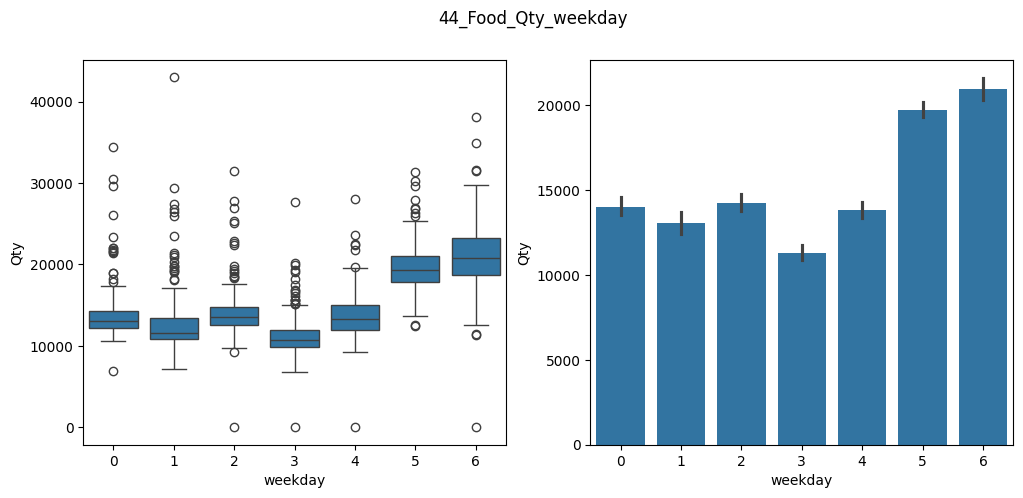

분산 분석 anova(Analysis Of Variance)


F_onewayResult(statistic=162.655392394118, pvalue=1.878860010960239e-149)

In [ ]:
# 그래프
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='weekday',y='Qty', data=food_sales)
plt.subplot(1,2,2)
sns.barplot(x='weekday',y='Qty', data=food_sales)
plt.suptitle('44_Food_Qty_weekday')
plt.show()
print('분산 분석 anova(Analysis Of Variance)')
spst.f_oneway(W_0,W_1,W_2,W_3,W_4,W_5,W_6)

##### 월별 분석

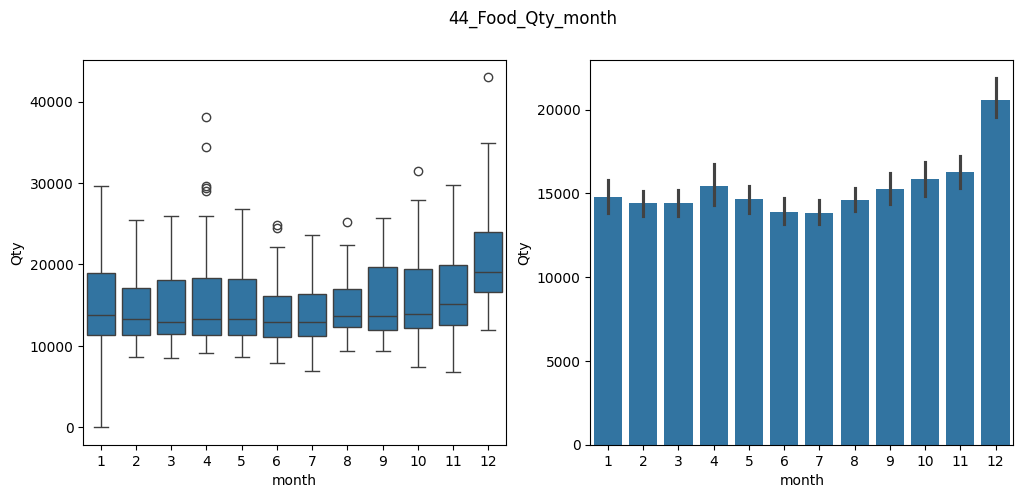

분산 분석 anova(Analysis Of Variance)


F_onewayResult(statistic=13.863092774402746, pvalue=2.901939795040988e-25)

In [ ]:
# 월별
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='month',y='Qty', data=food_sales)
plt.subplot(1,2,2)
sns.barplot(x='month',y='Qty', data=food_sales)
plt.suptitle('44_Food_Qty_month')
plt.show()

print('분산 분석 anova(Analysis Of Variance)')
spst.f_oneway(m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12)

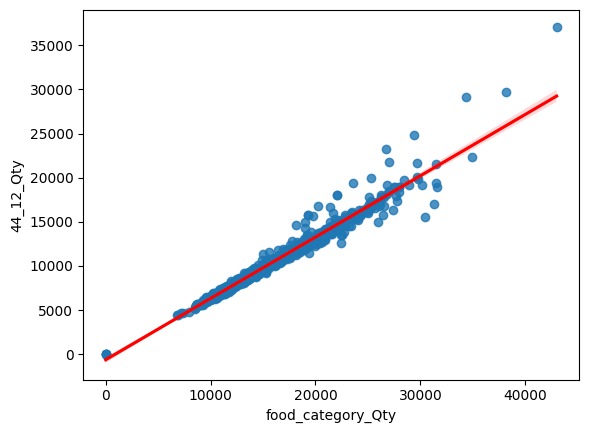

상관분석
PearsonRResult(statistic=0.9829196461556824, pvalue=0.0)
비선형 순위 상관분석
SignificanceResult(statistic=0.9945288948907635, pvalue=0.0)


In [ ]:
sns.regplot(x =food_sales['Qty'], y =sales44_12['Qty'], line_kws={'color': 'red'})
plt.xlabel('food_category_Qty')
plt.ylabel('44_12_Qty')
plt.show()
#상관분석
print('상관분석')
print(spst.pearsonr(food_sales['Qty'], sales44_12['Qty']))
#비선형 순위 상관분석
print('비선형 순위 상관분석')
print(spst.spearmanr(food_sales['Qty'], sales44_12['Qty']))

##### 월별 분석

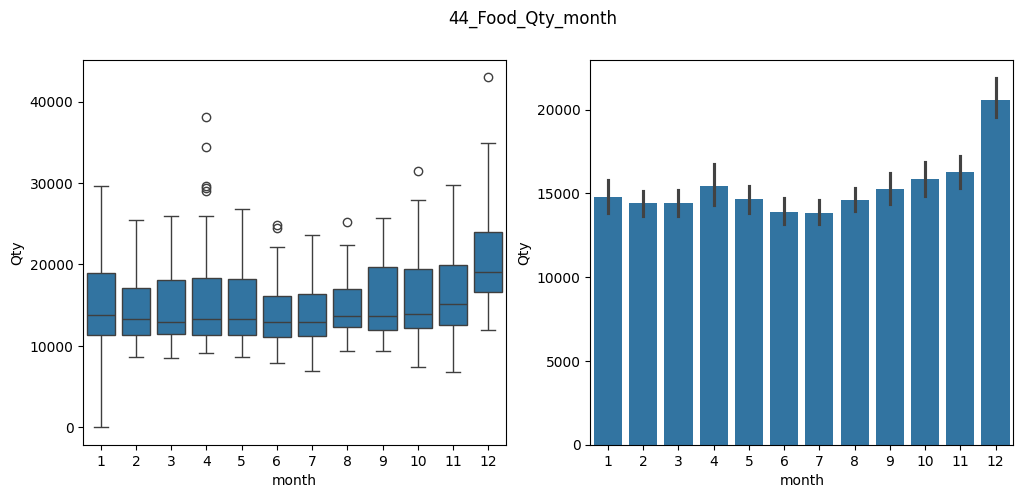

분산 분석 anova(Analysis Of Variance)


F_onewayResult(statistic=13.863092774402746, pvalue=2.901939795040988e-25)

In [ ]:
# 월별
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='month',y='Qty', data=food_sales)
plt.subplot(1,2,2)
sns.barplot(x='month',y='Qty', data=food_sales)
plt.suptitle('44_Food_Qty_month')
plt.show()

print('분산 분석 anova(Analysis Of Variance)')
spst.f_oneway(m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12)

### 3) 휘발류 가격과 상품 판매량 추이 비교

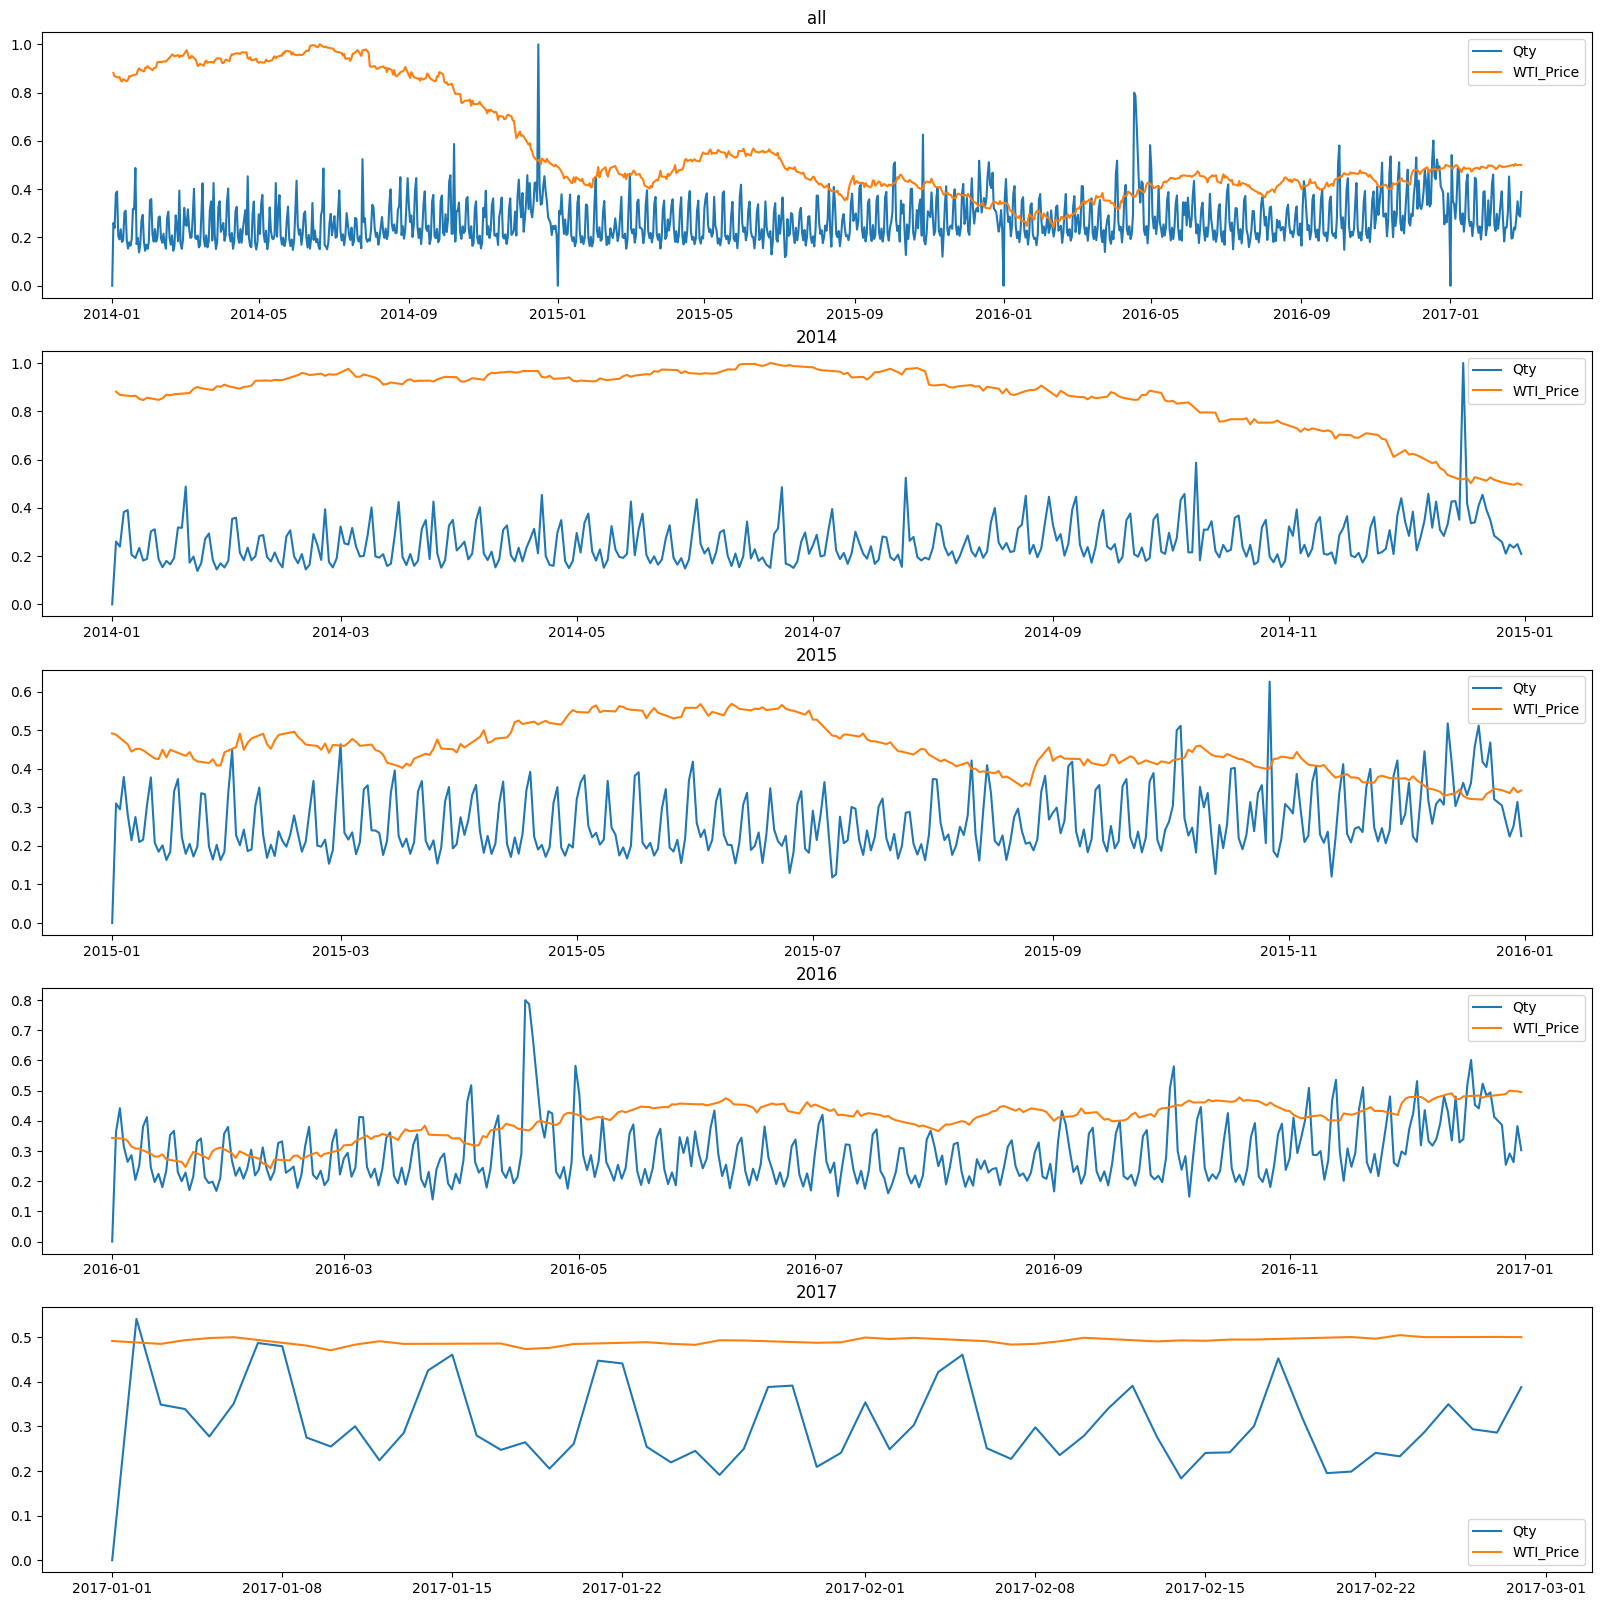

In [ ]:
# Product_ID = 12
qty_max = oil_qty['Qty'].max()
oil_max = oil_qty['WTI_Price'].max()


plt.figure(figsize=(20,20))
plt.subplot(5,1,1)
plt.plot(oil_qty['Date'],oil_qty['Qty']/qty_max, label='Qty')
plt.plot(oil_qty['Date'],oil_qty['WTI_Price']/oil_max, label='WTI_Price')
plt.legend()
plt.title('all')
years = [2014,2015,2016,2017]
for i in range(4):
    plt.subplot(5,1,i+2)
    plt.plot(oil_qty.loc[oil_qty['year']==years[i],'Date'],
                      oil_qty.loc[oil_qty['year']==years[i],'Qty']/qty_max,label='Qty')
    plt.plot(oil_qty.loc[oil_qty['year']==years[i],'Date'],
                      oil_qty.loc[oil_qty['year']==years[i],'WTI_Price']/oil_max,label='WTI_Price')
    plt.legend()
    plt.title(years[i])
plt.show()

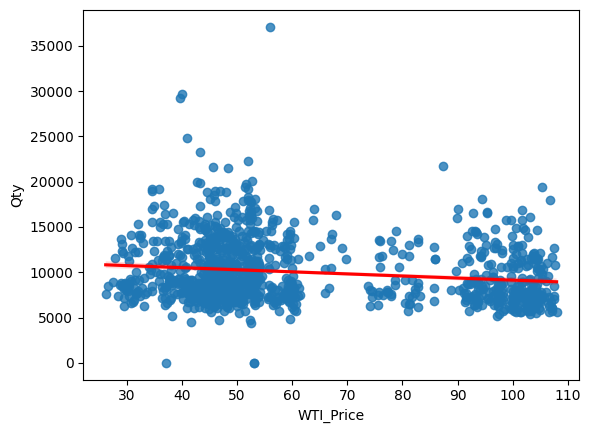

PearsonRResult(statistic=-0.15789746981463632, pvalue=7.249137875188681e-08)
SignificanceResult(statistic=-0.1642100952449833, pvalue=2.1057778776225143e-08)


In [ ]:
sns.regplot(x='WTI_Price', y='Qty', data = oil_qty, line_kws={'color': 'red'})
plt.show()
#상관분석
oil_qty = oil_qty.dropna()
print(spst.pearsonr(oil_qty['WTI_Price'], oil_qty['Qty']))
#비선형 순위 상관분석
print(spst.spearmanr(oil_qty['WTI_Price'], oil_qty['Qty']))

### 4) 방문 고객수와 상품 판매량 추이 비교

##### 일자별 변동 그래프

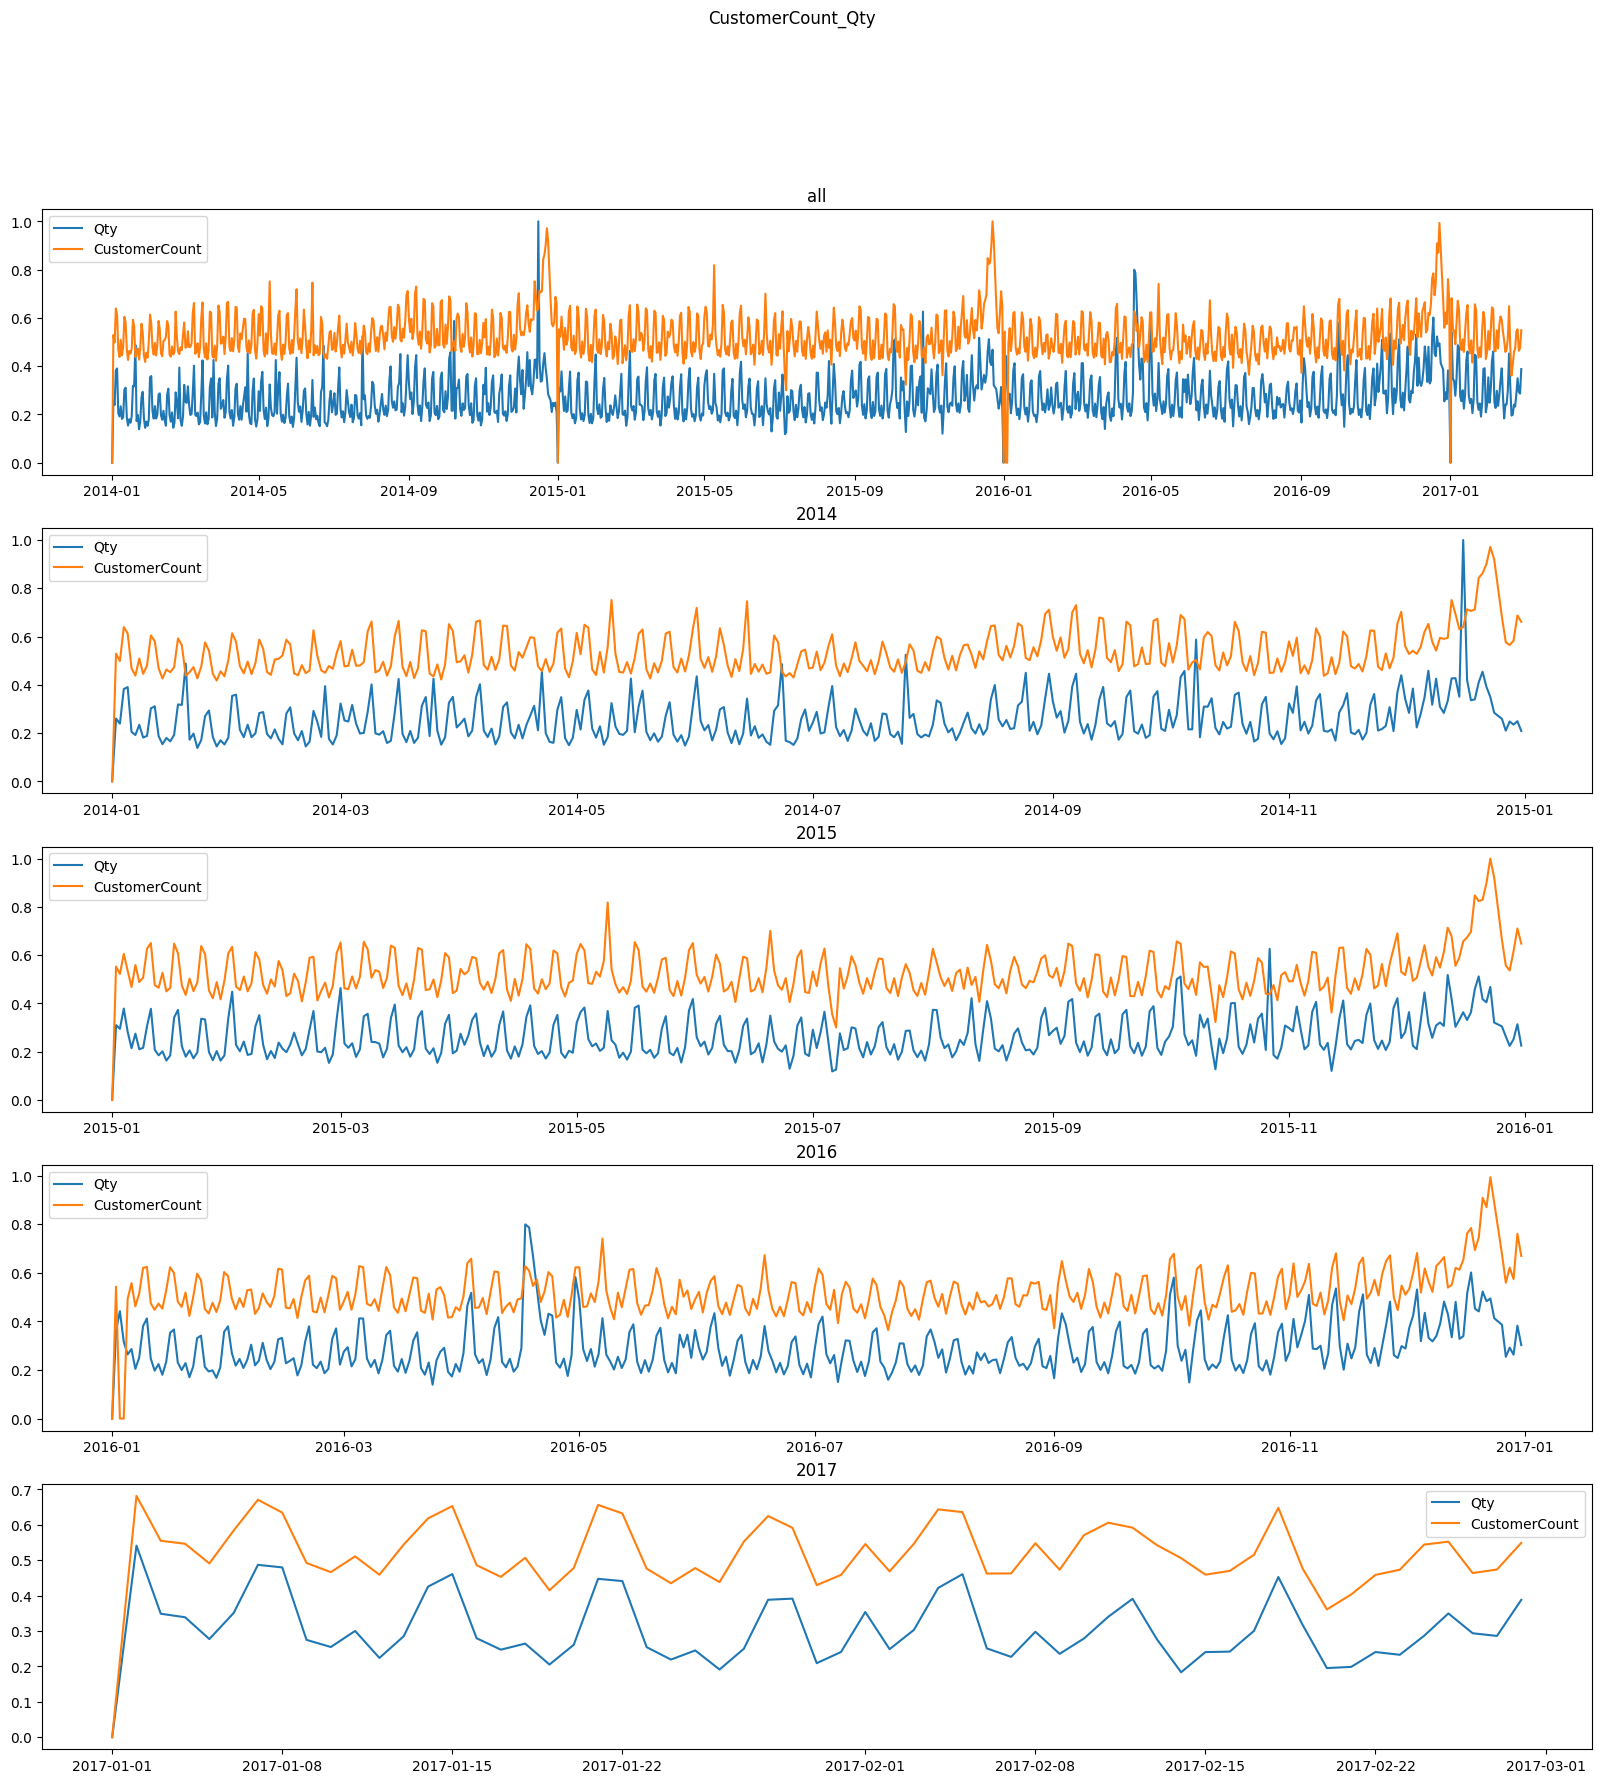

In [ ]:
# Product_ID = 12
qty_max = order_qty['Qty'].max()
cust_max = order_qty['CustomerCount'].max()


plt.figure(figsize=(20,20))
plt.subplot(5,1,1)
plt.plot(order_qty['Date'],order_qty['Qty']/qty_max, label='Qty')
plt.plot(order_qty['Date'],order_qty['CustomerCount']/cust_max, label='CustomerCount')
plt.legend()
plt.title('all')
years = [2014,2015,2016,2017]
for i in range(4):
    plt.subplot(5,1,i+2)
    plt.plot(order_qty.loc[order_qty['year']==years[i],'Date'],
                      order_qty.loc[order_qty['year']==years[i],'Qty']/qty_max,label='Qty')
    plt.plot(order_qty.loc[order_qty['year']==years[i],'Date'],
                      order_qty.loc[order_qty['year']==years[i],'CustomerCount']/cust_max,label='CustomerCount')
    plt.legend()
    plt.title(years[i])
plt.suptitle('CustomerCount_Qty')
plt.show()

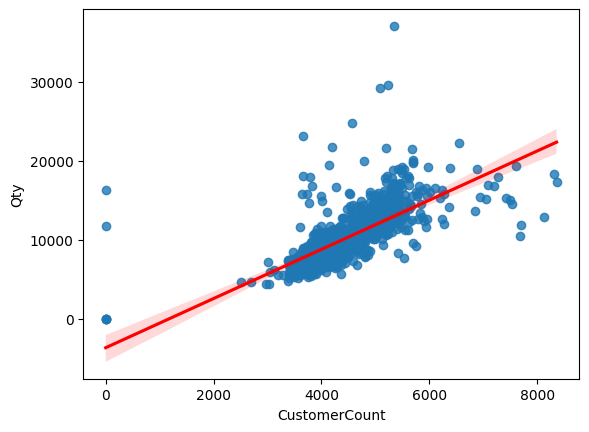

상관분석
PearsonRResult(statistic=0.7123695976470087, pvalue=4.6451226397069774e-179)
비선형 순위 상관분석
SignificanceResult(statistic=0.8168829633629484, pvalue=4.377025239588993e-277)


In [ ]:
sns.regplot(x='CustomerCount', y='Qty', data = order_qty, line_kws={'color': 'red'})
plt.show()
#상관분석
oil_qty = oil_qty.dropna()
print('상관분석')
print(spst.pearsonr(order_qty['CustomerCount'], order_qty['Qty']))
#비선형 순위 상관분석
print('비선형 순위 상관분석')
print(spst.spearmanr(order_qty['CustomerCount'], order_qty['Qty']))

##### 요일별 분석

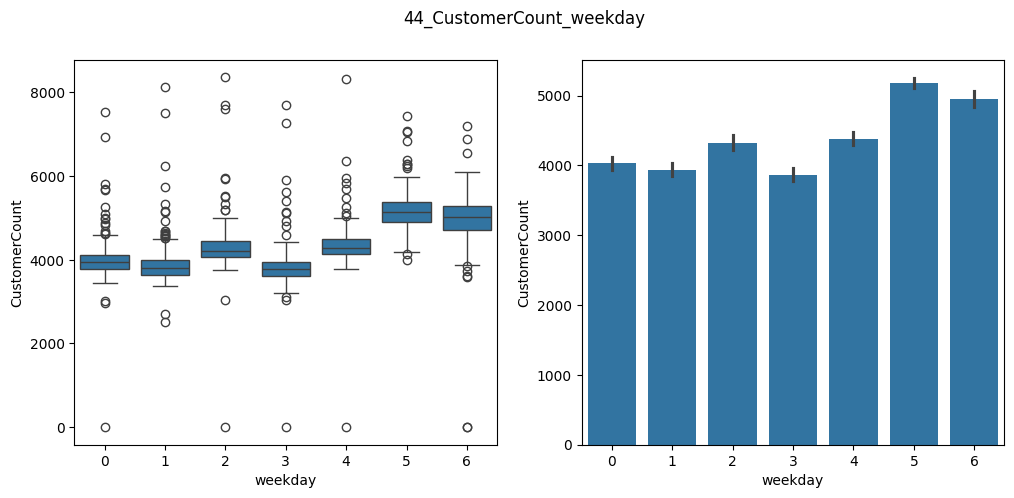

분산 분석 anova(Analysis Of Variance)


F_onewayResult(statistic=104.27674831925887, pvalue=8.407285369687566e-105)

In [ ]:
# 그래프
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='weekday',y='CustomerCount', data=order_qty)
plt.subplot(1,2,2)
sns.barplot(x='weekday',y='CustomerCount', data=order_qty)
plt.suptitle('44_CustomerCount_weekday')
plt.show()
print('분산 분석 anova(Analysis Of Variance)')
spst.f_oneway(W_0,W_1,W_2,W_3,W_4,W_5,W_6)

##### 월별 분석

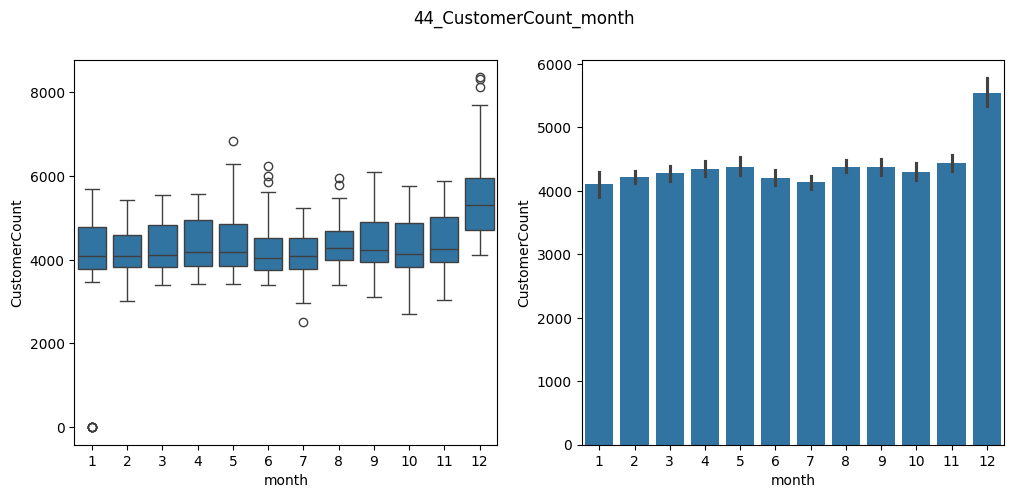

분산 분석 anova(Analysis Of Variance)


F_onewayResult(statistic=25.974522086691902, pvalue=1.587176875273051e-48)

In [ ]:
# 월별
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='month',y='CustomerCount', data=order_qty)
plt.subplot(1,2,2)
sns.barplot(x='month',y='CustomerCount', data=order_qty)
plt.suptitle('44_CustomerCount_month')
plt.show()

print('분산 분석 anova(Analysis Of Variance)')
spst.f_oneway(m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12)

## **(2) 시계열 패턴 찾아보기2**

* 변화량과 비교해보기

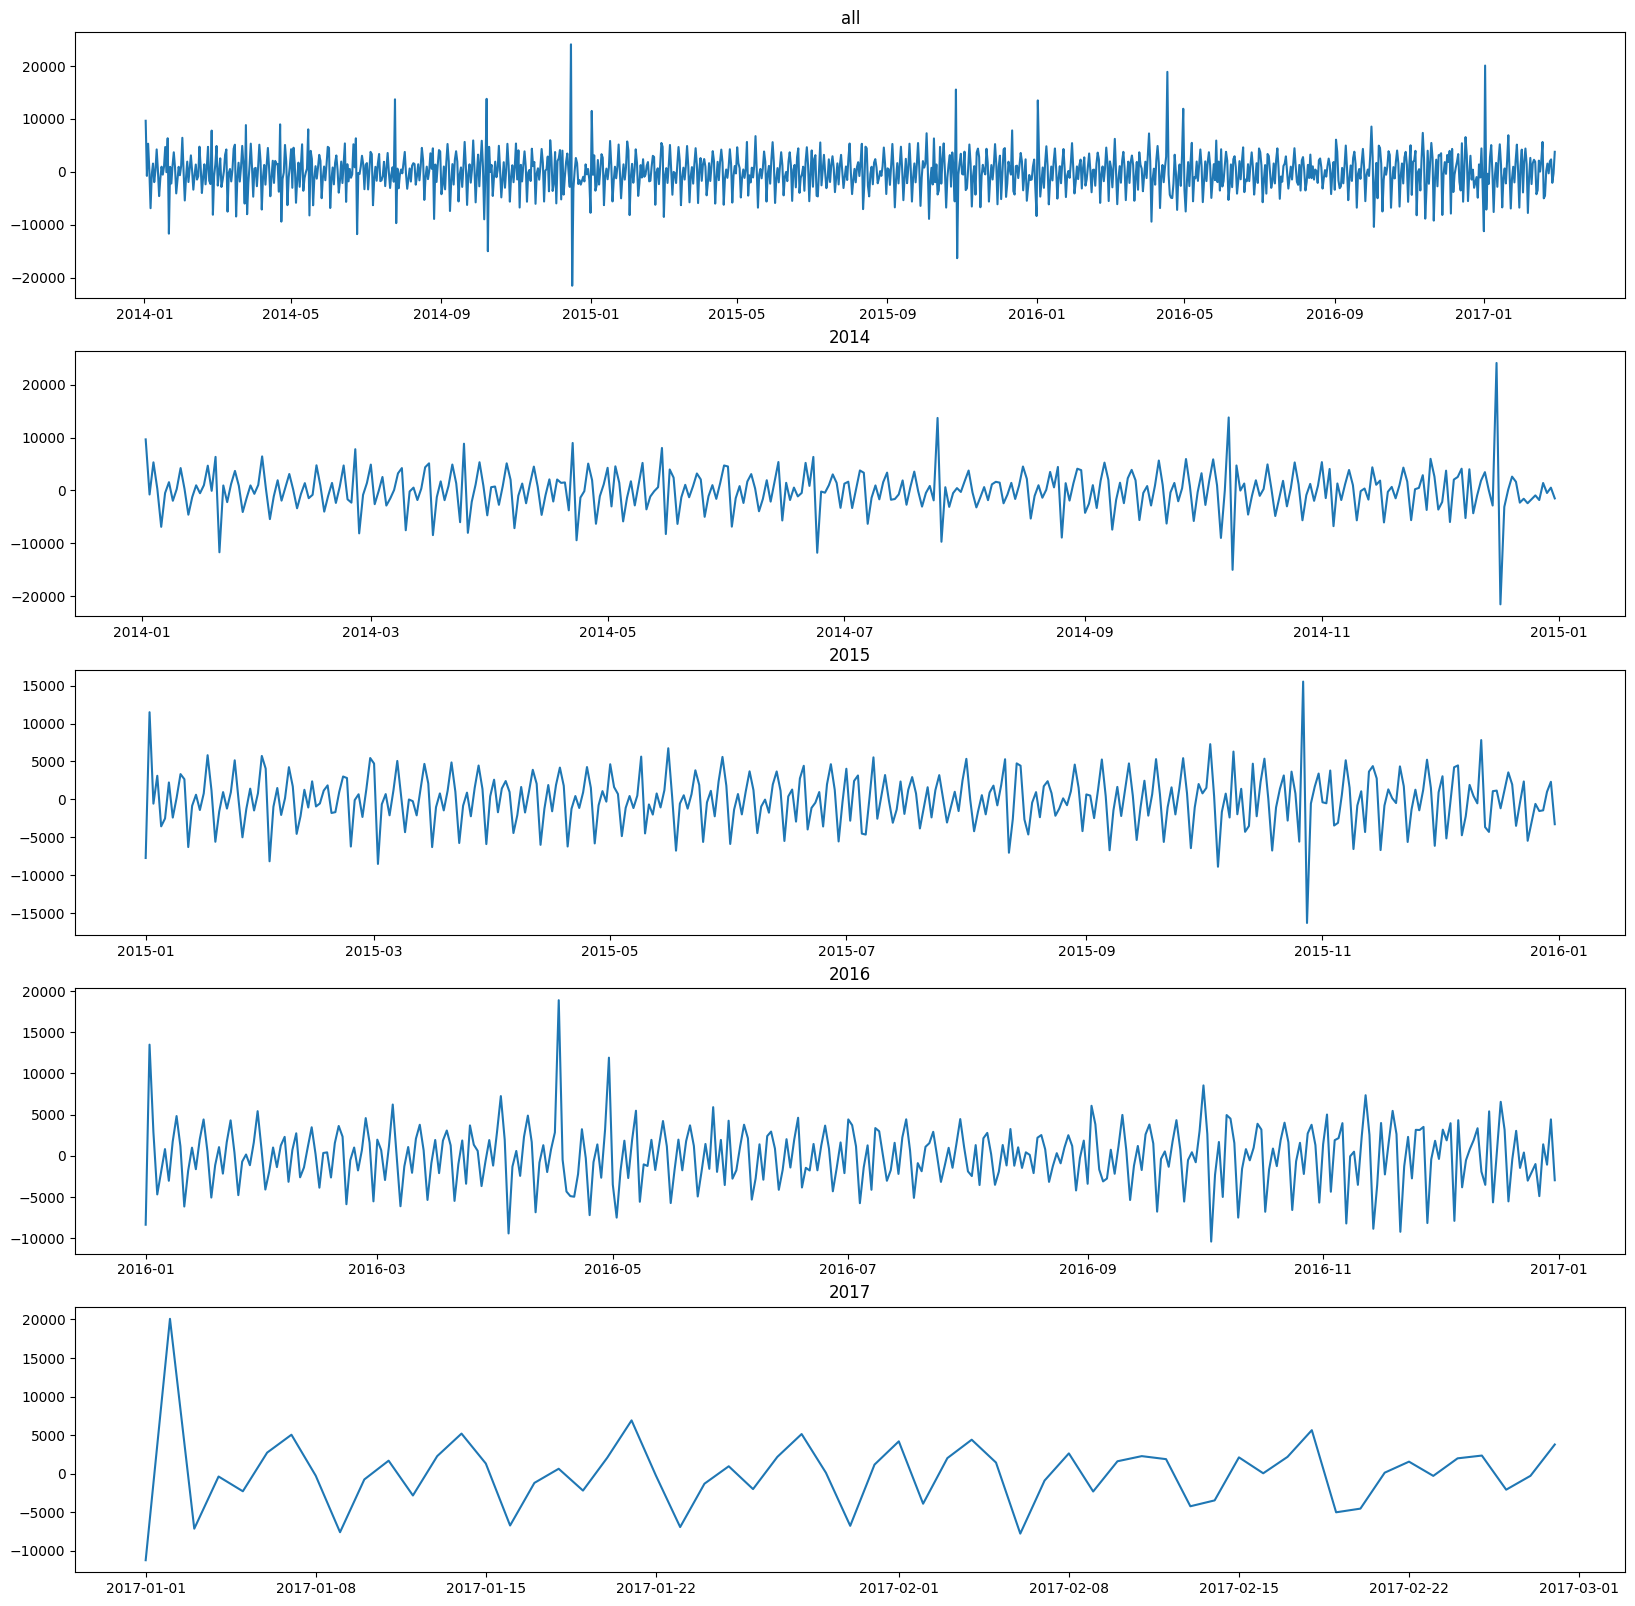

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(5,1,1)
plt.plot(sales44_12_s['Date'],sales44_12_s['variation'])
plt.title('all')
years = [2014,2015,2016,2017]
for i in range(4):
    plt.subplot(5,1,i+2)
    plt.plot(sales44_12_s.loc[sales44_12_s['year']==years[i],'Date'],
                      sales44_12_s.loc[sales44_12_s['year']==years[i],'variation'])
    plt.title(years[i])
plt.show()

### 2) 요일별 변화량 비교

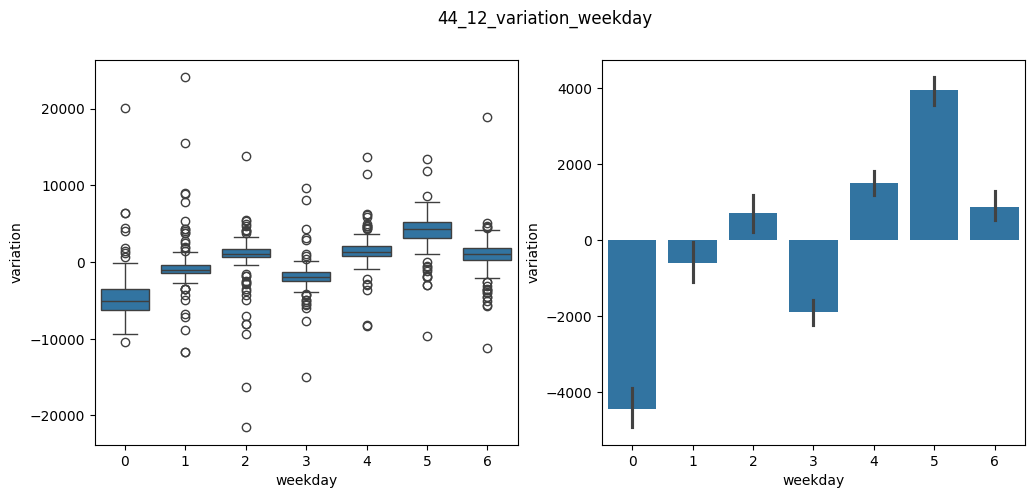

In [ ]:
# 그래프
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='weekday',y='variation', data=sales44_12_s)
plt.subplot(1,2,2)
sns.barplot(x='weekday',y='variation', data=sales44_12_s)
plt.suptitle('44_12_variation_weekday')
plt.show()

### 3) 시계열 데이터 분해

In [ ]:
def decomp_plot(Product_ID, sdate, edate, period ) :

    # 시계열 데이터 분해
    temp = sales.loc[(sales['Store_ID'] == 44) & (sales['Product_ID'] == Product_ID) & (sales['Date'].between(sdate, edate))]
    decomp = sm.tsa.seasonal_decompose(temp['Qty'], model = 'additive', period = period)

    # 시계열 분해 결과를 받아서 데이터프레임으로 저장
    result = pd.DataFrame({'observed':decomp.observed, 'trend':decomp.trend, 'seasonal':decomp.seasonal, 'residual':decomp.resid})

    # 4개의 그래프로 나눠서 그리기
    plt.figure(figsize=(15, 8))

    plt.subplot(4,1,1)
    plt.plot(result['observed'])
    plt.ylabel('observed')

    plt.subplot(4,1,2)
    plt.plot(result['trend'])
    plt.ylabel('trend')

    plt.subplot(4,1,3)
    plt.plot(result['seasonal'])
    plt.ylabel('seasonal')

    plt.subplot(4,1,4)
    plt.plot(result['residual'])
    plt.ylabel('residual')
    plt.show()

    return result

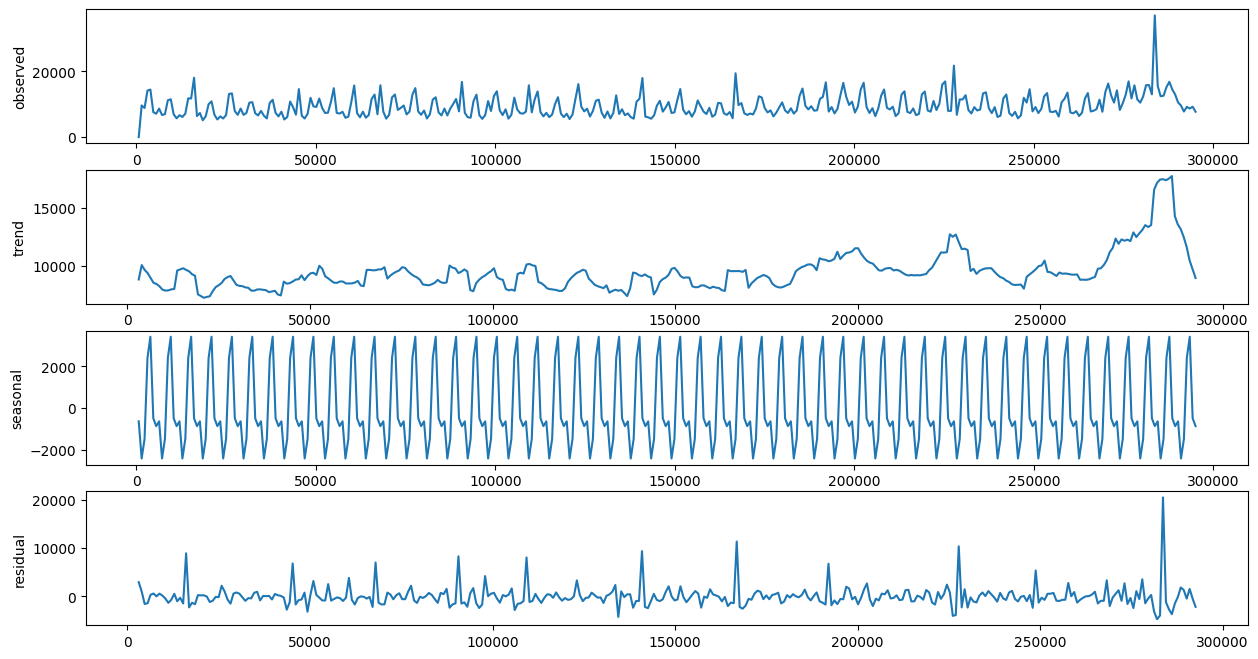

In [ ]:
weekday_an = decomp_plot(12, '2014-1-1', '2014-12-31', 7)

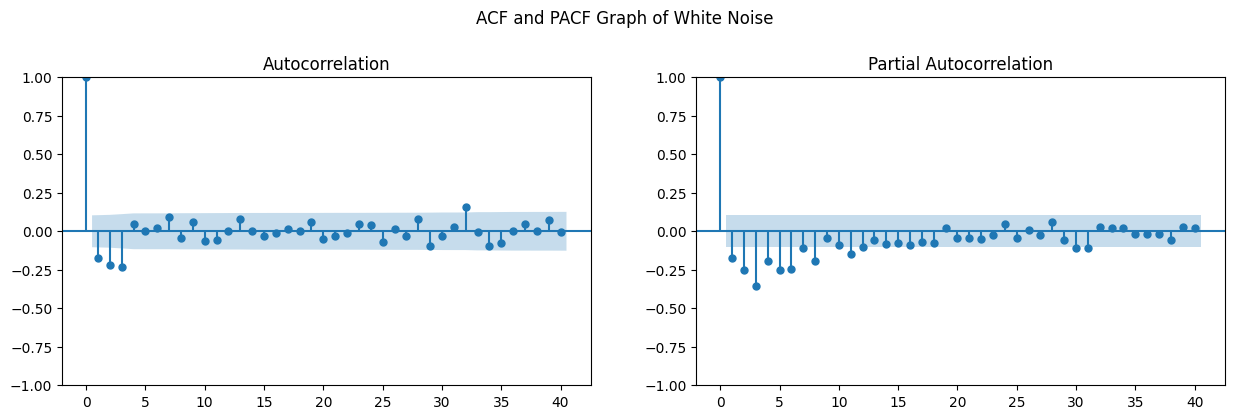

In [ ]:
# 잔차분석 weekday
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(weekday_an['residual'].dropna(), lags=40, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(weekday_an['residual'].dropna(), lags=40, ax=axes[1])
fig.suptitle('ACF and PACF Graph of White Noise', y = 1.05)
plt.show()

# **3.패턴 정리하기**

* 다양한 탐색을 통해 찾은 시계열 패턴을 적어 봅시다.

- 상품판매량은 요일별 월별로 특정 패턴을 가지고 있다.

- 동일카테고리 상품들의 판매량과 강한 상관관계를 보인다.

- 휘발유 가격은 판매량과 약한 음의관계를 보였다

- 방문고객수와 판매량은 강한 상관관계를 보인다.

- 강한 상관관계를 갖는 동일카테고리 판매량과 방문고객수는 상품판매량과 비슷하게 주말(토,일)과 12월에 값이 높게 나타나는 패턴을 보였다.